**Terminology**


1.   Neural Network
2.   Parametric Model
3.   Weight Initialization
4.   Dataset
5.   Optimizer: Optmizer, Loss Function
6.   Model Compilation
7.   Training
8.   Inference (Predict)



# Example 1: Simple regression model

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt

2024-06-30 11:57:44.500880: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-30 11:57:44.525979: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-30 11:57:44.526004: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-30 11:57:44.526019: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-30 11:57:44.531572: I tensorflow/core/platform/cpu_feature_g

# examples: [(-2, -8), (-1, -5), (0, -2), (1, 1), (2, 4), (3, 7)]

In [2]:
X = [-2, -1, 0, 1, 2, 3]  #  Features

In [3]:
Y = [-8, -5, -2, 1, 4, 7]  # Labels

# By looking at the numbers, we can say that the,

# Relationship is Y = 3X - 2

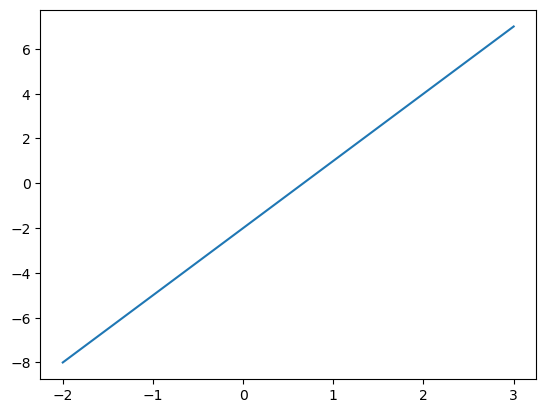

In [4]:
plt.plot(X, Y)

In [5]:
def f(x):
    return 3*x - 2

y = f(x = 10)
print('y = ', y)

y =  28


## Simplest Possible Neural Network

In [6]:
model = keras.Sequential([keras.layers.Dense(units = 1, input_shape = [1])])

2024-06-30 11:57:45.941901: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: UNKNOWN ERROR (100)


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(optimizer = keras.optimizers.SGD(learning_rate=0.01), loss = 'mean_squared_error')

# Before Training

In [9]:
print(model.predict([10.0]))

1/1 [==============================] - 0s 64ms/step
[[7.344636]]


In [10]:
w, b = model.get_weights()
print(f'Before Training... \n weight = {w} \n bias = {b}')

Before Training... 
 weight = [[0.7344636]] 
 bias = [0.]


In [11]:
10.0 * w + b

array([[7.344636]], dtype=float32)

In [12]:
hist = model.fit(X, Y, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 144ms/step - loss: 15.7223
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 14.2139
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 12.8795
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 11.6978
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 10.6500
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 9.7197
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 8.8925
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 8.1558
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 7.4988
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 6.9117
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 6.3862
Epoch 12/500
1/1 [==============================] - 0s 5ms/step - loss: 5.9150
Epoch 13/500
1/1 [==============================] - 0s

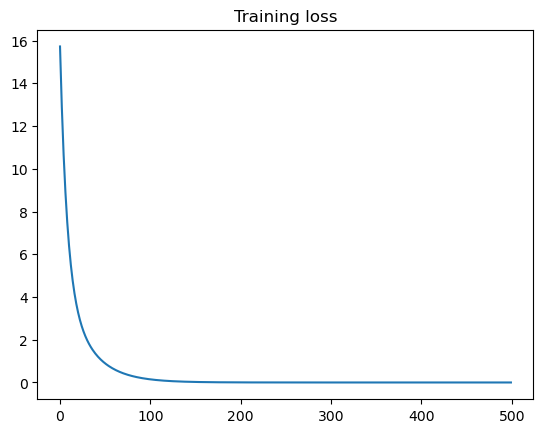

In [13]:
plt.title('Training ' + 'loss')
plt.plot(hist.history['loss'])
plt.show()

In [14]:
y = f(x = 10)
print(f'Expected Output = {y}')

Expected Output = 28


In [15]:
pred = model.predict([10.0])

print(f'Actual Output = {pred[0][0]}')

1/1 [==============================] - 0s 22ms/step
Actual Output = 27.9996395111084


In [16]:
w, b = model.get_weights()
print(f'After Training.. \n weight = {w} \n bias = {b}')

After Training.. 
 weight = [[2.999934]] 
 bias = [-1.9997005]
